# Cars Data Exploration
Review the cars dataset

In [516]:
# import project libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction import FeatureHasher
from gensim.models import Phrases
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import OneHotEncoder
import re

### Collect data 
Read csv file to collect cars data and filter relevant features

In [517]:
# Read CSV file
cars_df = pd.read_csv(r'C:\Users\cesar_0qb0xal\Documents\GitHub\cars_ml_project\data\data_exploration\input\cars.csv')
cars_df

,Unnamed: 0,msrp,year,canonical_mmty,model,local_zone,interior_color,aff_code,price,price_badge,...,mileage,make,bodystyle,cat,vin,canonical_mmt,fuel_type,stock_type,exterior_color,page_channel
0,0,57215.0,2024,Chevrolet:Blazer EV:RS:2024,Blazer EV,NaN,Black,national,54595.0,NaN,...,0.0,Chevrolet,SUV,ev_crossover_midsize,3GNKDCRJ6RS227894,Chevrolet:Blazer EV:RS,Electric,New,Sterling Gray Metallic,shopping
1,1,58845.0,2024,RAM:ProMaster 2500:High Roof:2024,ProMaster 2500,NaN,Black,national,52446.0,NaN,...,0.0,RAM,Cargo Van,van_fullsize,3C6LRVDG0RE118763,RAM:ProMaster 2500:High Roof,Gasoline,New,Bright White Clearcoat,shopping
2,2,58795.0,2024,Mercedes-Benz:Sprinter 2500:High Roof:2024,Sprinter 2500,NaN,NaN,national,54295.0,NaN,...,8.0,Mercedes-Benz,Cargo Van,van_fullsize,W1Y4KCHY8RT178723,Mercedes-Benz:Sprinter 2500:High Roof,Diesel,New,Blue Grey,shopping
3,3,33815.0,2024,Honda:CR-V:EX:2024,CR-V,NaN,Gray,national,NaN,NaN,...,7.0,Honda,SUV,crossover_compact,5J6RS3H44RL004214,Honda:CR-V:EX,Gasoline,New,Radiant Red Metallic,shopping
4,4,27995.0,2024,Chevrolet:Equinox:LS:2024,Equinox,NaN,Medium Ash Gray,national,24803.0,NaN,...,0.0,Chevrolet,SUV,crossover_midsize,3GNAXHEG1RL299011,Chevrolet:Equinox:LS,Gasoline,New,Summit White,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58344,58344,56115.0,2024,Cadillac:XT5:Premium Luxury:2024,XT5,NaN,Black,national,56115.0,NaN,...,5.0,Cadillac,SUV,luxurysuv_crossover,1GYKNDRS7RZ748902,Cadillac:XT5:Premium Luxury,Gasoline,New,Silver Metallic,shopping
58345,58345,42975.0,2024,Audi:A3:Premium Plus:2024,A3,NaN,Santos Brown,national,42975.0,NaN,...,10.0,Audi,Sedan,luxurypassenger_standard,WAUBUDGY4RA122137,Audi:A3:Premium Plus,Gasoline,New,Ibis White,shopping
58346,58346,27875.0,2024,Mazda:CX-30:Select:2024,CX-30,NaN,Black/Black,national,27875.0,NaN,...,15.0,Mazda,SUV,crossover_compact,3MVDMBBM2RM622786,Mazda:CX-30:Select,Gasoline,New,Deep Crystal Blue Mica,shopping
58347,58347,33389.0,2024,Volkswagen:Taos:1.5T SE:2024,Taos,NaN,Black,national,30618.0,NaN,...,5.0,Volkswagen,SUV,crossover_compact,3VVVX7B29RM064803,Volkswagen:Taos:1.5T SE,Gasoline,New,Cornflower Blue,shopping


In [518]:
# Filter relevant features
columns_to_drop = ['page_channel', 'canonical_mmt', 'vin', 'dealer_zip', 'dealer_name', 'trim', 'aff_code', 'canonical_mmty', 'Unnamed: 0', 'local_zone', 'price_badge']
cars_df.drop(columns=columns_to_drop, inplace=True)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,exterior_color
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,Sterling Gray Metallic
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,Bright White Clearcoat
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,Blue Grey
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,New,Radiant Red Metallic
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,Summit White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58344,56115.0,2024,XT5,Black,56115.0,AWD,5.0,Cadillac,SUV,luxurysuv_crossover,Gasoline,New,Silver Metallic
58345,42975.0,2024,A3,Santos Brown,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,New,Ibis White
58346,27875.0,2024,CX-30,Black/Black,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,New,Deep Crystal Blue Mica
58347,33389.0,2024,Taos,Black,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,New,Cornflower Blue


In [519]:
# Print the dataset shape
cars_df.shape

(58349, 13)

### Clean Data
Remove duplicates in dataset

In [520]:
# Remove duplicates
cars_df.drop_duplicates(inplace=True)
cars_df.shape

(26594, 13)

### Apply Features transformation

#### msrp
manufacturer's suggested retail price. Replace 0 values by NaN, 0 is not a valid price.

In [521]:
# Apply msrp value
def map_msrp(msrp):
    """
    Replace 0 values by null

    :param msrp: manufacturer's suggested retail price
    """
    if msrp == 0:
        return np.nan
    return msrp

In [522]:
# Apply msrp transformation
cars_df['msrp'] = cars_df['msrp'].map(map_msrp)

In [523]:
cars_df['msrp'].skew()

2.6388067131303314

In [524]:
# Check min value
cars_df['msrp'].min()

6000.0

In [525]:
# Check max value
cars_df['msrp'].max()

329486.0

<Axes: >

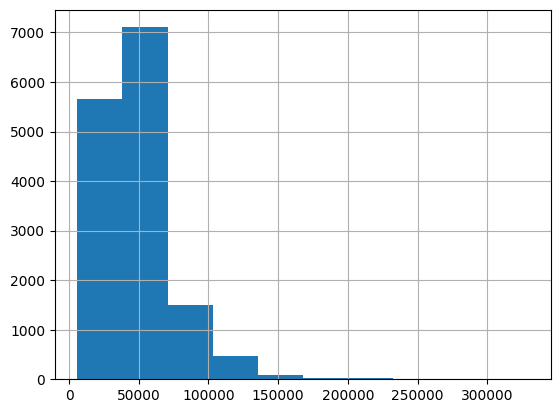

In [526]:
# plot hist
cars_df['msrp'].hist()

#### year
No transformation needed

<Axes: >

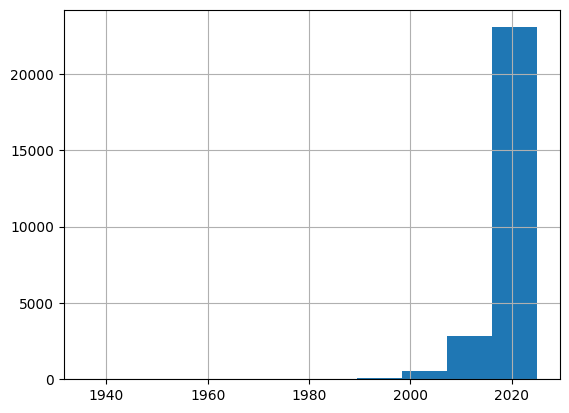

In [527]:
cars_df['year'].hist()

In [528]:
# Check the skew.
# Skew measures the asymmetry of the distribution relative to the normal distribution
cars_df['year'].skew()

-3.6162086401904463

In [529]:
# Check the kurtosis
# Kurtosis describes the height and sharpness of the central peak, relative to that of a standard bell curve
cars_df['year'].kurtosis()

23.8067718145981

A transformation is needed to handle the high negative skew and kurtosis, The current values represent the presence of outliers

#### model
Cars model, it's related with the maker

In [530]:
cars_df['model'].value_counts(dropna=False)

model
Outback        588
Escape         515
Tiguan         490
Equinox        447
Rogue          420
              ... 
Yaris Sedan      1
AMG CLS          1
Vue              1
645              1
Mountaineer      1
Name: count, Length: 999, dtype: int64

In [531]:
# Review unique values
len(cars_df['model'].unique())

999

Apply hash trick to handle the high-cardinality feature.

In [532]:
# Transform the categorical column into a format suitable for FeatureHasher
model_data = cars_df['model'].apply(lambda x: {x: 1}).tolist()

In [533]:
# Define the number of hash space
# By default it's the total number of unique options divided by 5. Check the 'Machine Learning Design patterns' book chapter 1
n_hash = int(len(cars_df['model'].unique())/20) # This values is a hyperparameter
# Initialize FeatureHasher
hasher = FeatureHasher(n_features=n_hash, input_type='dict')
# Apply FeatureHasher
model_hashed_features = hasher.transform(model_data)
model_hashed_features.shape

(26594, 49)

In [534]:
# Generate model hashed dataframe
model_hashed_df = pd.DataFrame(model_hashed_features.toarray(), columns=[f'model_hashed_{i}' for i in range(model_hashed_features.shape[1])])
model_hashed_df.reset_index(drop=True, inplace=True)
model_hashed_df

,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,model_hashed_5,model_hashed_6,model_hashed_7,model_hashed_8,model_hashed_9,...,model_hashed_39,model_hashed_40,model_hashed_41,model_hashed_42,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [535]:
# Concatenate the dataframes
cars_df.reset_index(drop=True, inplace=True)
cars_df = pd.concat([cars_df, model_hashed_df], axis=1)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,...,model_hashed_39,model_hashed_40,model_hashed_41,model_hashed_42,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26589,46720.0,2024,Bronco,Gray,45318.0,Four-wheel Drive,5.0,Ford,SUV,suv_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26590,42975.0,2024,A3,Santos Brown,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26591,27875.0,2024,CX-30,Black/Black,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26592,33389.0,2024,Taos,Black,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [536]:
# Once used drop the model feature
cars_df.drop(columns='model', inplace=True)
cars_df.shape

(26594, 61)

#### exterior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [537]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
Black                     1550
White                      870
Gray                       673
Summit White               581
Bright White Clearcoat     495
                          ... 
Sonic Iridium                1
Smoke                        1
Plasma Green Pearl           1
Mean (Yellow)                1
Road Rider Brown             1
Name: count, Length: 2150, dtype: int64

In [538]:
# Check unique values
len(cars_df['exterior_color'].unique())

2150

Apply lower case and remove special characters to help the vector model

In [539]:
def clean_exterior_color(exterior_color):
    # Check if value is empty
    if pd.isna(exterior_color):
        return 'unknown'
    # Convert interior_color to lower case
    exterior_color = exterior_color.lower()
    # Remove special characters
    exterior_color = re.sub(r'[\W_+w/\/]', ' ', exterior_color)
    # Remove double spaces
    exterior_color = re.sub(r'\s+', ' ', exterior_color)
    # Return formated text
    return exterior_color

In [540]:
# Apply lower case and remove special characters
cars_df['exterior_color'] = cars_df['exterior_color'].apply(clean_exterior_color)

In [541]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
black                    1588
 hite                     917
gray                      705
summit hite               581
bright hite clearcoat     495
                         ... 
viper red clearcoat         1
manhattan bro n             1
quartzite metallic          1
navy blue                   1
road rider bro n            1
Name: count, Length: 2088, dtype: int64

In [542]:
# Tokenize colors sentences
tokenized_exterior_color = [simple_preprocess(sentence) for sentence in cars_df['exterior_color'].tolist()]

In [543]:
# Train the Word2Vec model
exterior_color_vector_size = 3 # This is a hyperparameter. #D to keep it user friendly
exterior_color_model = Word2Vec(sentences=tokenized_exterior_color, vector_size=exterior_color_vector_size, window=5, min_count=1, workers=4)

In [544]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(exterior_color_phrase, model):
    exterior_color_words = exterior_color_phrase.split()
    exterior_color_word_vectors = [model.wv[word] for word in exterior_color_words if word in model.wv]
    if not exterior_color_word_vectors:
        print(f"No words found in model for phrase: {exterior_color_phrase}")
        return np.nan
    return sum(exterior_color_word_vectors) / len(exterior_color_word_vectors)


In [545]:
# Calculate the vertor for each interior color
exterior_color_vectors_s = cars_df['exterior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, exterior_color_model))
exterior_color_vectors_s

No words found in model for phrase: 9561002 9561002
No words found in model for phrase: gb0
No words found in model for phrase: 0085
No words found in model for phrase: 9561002 9561002
No words found in model for phrase: bb2
No words found in model for phrase: 08x5
No words found in model for phrase: silverskymetalli
No words found in model for phrase: 01f7
No words found in model for phrase: 08x8
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: ay2
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 0223
No words found in model for phrase: l


0         [-1.2134823, 0.76447123, 0.57858056]
1          [-0.4767921, -0.6916062, 1.2091936]
2         [-1.4641775, -0.24665408, 1.3422549]
3         [-1.0733649, -0.21023798, 1.3197156]
4        [-0.44745296, -0.8354318, 0.81722295]
                         ...                  
26589     [-0.9236058, -0.52294147, 1.3692533]
26590    [-0.12205791, -0.5773237, 0.82904494]
26591      [-0.5796162, -0.6400977, 1.6080527]
26592     [-0.7356065, -0.11006715, 0.8410652]
26593        [-1.198891, 0.7092702, 0.5722212]
Name: exterior_color, Length: 26594, dtype: object

In [546]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*exterior_color_vector_size
exterior_color_vectors_s = exterior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [547]:
# Generate the interior color df using the transformed feature vectors
exterior_color_df = pd.DataFrame(exterior_color_vectors_s.values.tolist(), columns=[f'exterior_color_x{i}' for i in range(len(exterior_color_vectors_s[0]))])
exterior_color_df.reset_index(drop=True, inplace=True)
exterior_color_df

,exterior_color_x0,exterior_color_x1,exterior_color_x2
0,-1.213482,0.764471,0.578581
1,-0.476792,-0.691606,1.209194
2,-1.464177,-0.246654,1.342255
3,-1.073365,-0.210238,1.319716
4,-0.447453,-0.835432,0.817223
...,...,...,...
26589,-0.923606,-0.522941,1.369253
26590,-0.122058,-0.577324,0.829045
26591,-0.579616,-0.640098,1.608053
26592,-0.735606,-0.110067,0.841065


In [548]:
# Concatenate the dataframes
cars_df.reset_index(drop=True, inplace=True)
cars_df = pd.concat([cars_df, exterior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,model_hashed_42,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,exterior_color_x0,exterior_color_x1,exterior_color_x2
0,57215.0,2024,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.213482,0.764471,0.578581
1,58845.0,2024,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.476792,-0.691606,1.209194
2,58795.0,2024,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.464177,-0.246654,1.342255
3,33815.0,2024,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.073365,-0.210238,1.319716
4,27995.0,2024,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.447453,-0.835432,0.817223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26589,46720.0,2024,Gray,45318.0,Four-wheel Drive,5.0,Ford,SUV,suv_midsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.923606,-0.522941,1.369253
26590,42975.0,2024,Santos Brown,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.122058,-0.577324,0.829045
26591,27875.0,2024,Black/Black,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.579616,-0.640098,1.608053
26592,33389.0,2024,Black,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.735606,-0.110067,0.841065


In [549]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = cars_df['exterior_color_x0'].values.tolist()
y = cars_df['exterior_color_x1'].values.tolist()
z = cars_df['exterior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['exterior_color'].values.tolist()

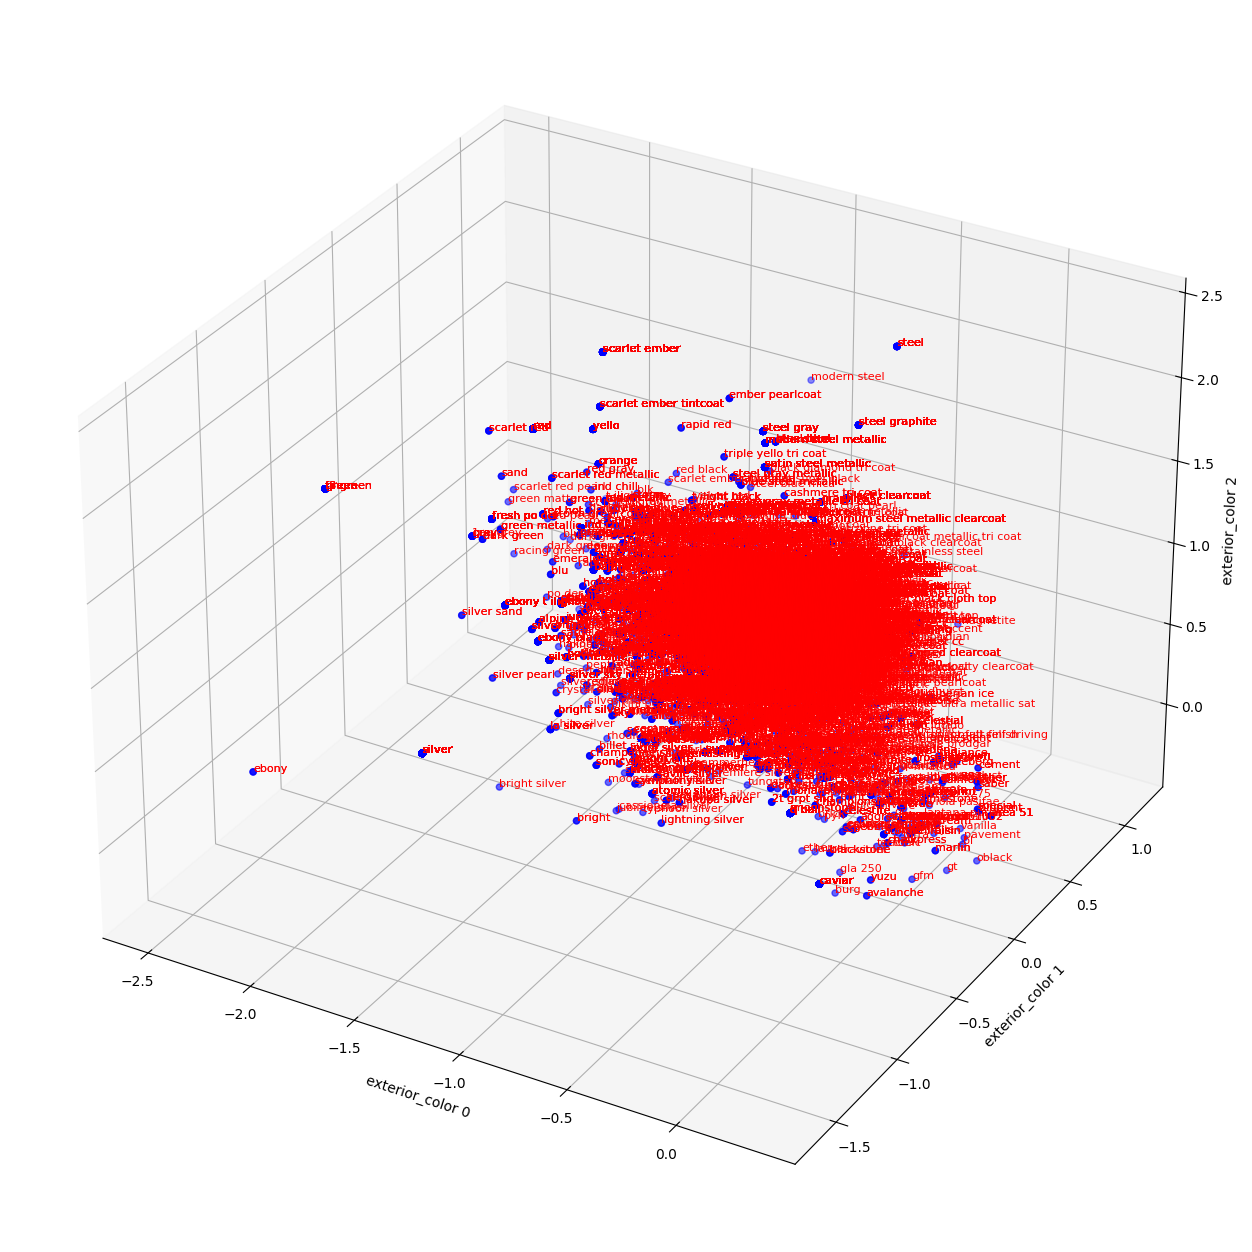

In [550]:
# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('exterior_color 0')
ax.set_ylabel('exterior_color 1')
ax.set_zlabel('exterior_color 2')

# Show plot
plt.show()

In [551]:
# Once used drop the exterior_color feature
cars_df.drop(columns='exterior_color', inplace=True)
cars_df.shape

(26594, 63)

#### interior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [552]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
Black                              9973
Gray                               1759
Jet Black                          1643
Ebony                              1534
NaN                                1406
                                   ... 
Black w/Gray Contrast Stitching       1
Dk Bge/Ttn Blk                        1
Black / Ceramic                       1
Black/Navy                            1
Santos Brown                          1
Name: count, Length: 1179, dtype: int64

In [553]:
# Check unique values
len(cars_df['interior_color'].unique())

1179

Apply lower case and remove special characters to help the vector model

In [554]:
def clean_interior_color(interior_color):
    # Check if value is empty
    if pd.isna(interior_color):
        return 'unknown'
    # Convert interior_color to lower case
    interior_color = interior_color.lower()
    # Remove special characters
    interior_color = re.sub(r'[\W_+w/\/]', ' ', interior_color)
    # Remove double spaces
    interior_color = re.sub(r'\s+', ' ', interior_color)
    # Return formated text
    return interior_color

In [555]:
# Apply lower case and remove special characters
cars_df['interior_color'] = cars_df['interior_color'].apply(clean_interior_color)

In [556]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
black                          10048
gray                            1783
jet black                       1646
ebony                           1536
unknown                         1406
                               ...  
java black                         1
qh                                 1
cedar bro n                        1
titan black quarzit leather        1
santos bro n                       1
Name: count, Length: 1077, dtype: int64

In [557]:
# Tokenize colors sentences
tokenized_interior_color = [simple_preprocess(sentence) for sentence in cars_df['interior_color'].tolist()]

In [558]:
# Train the Word2Vec model
interior_color_vector_size = 3 # This is a hyperparameter. #D to keep it user friendly
interior_color_model = Word2Vec(sentences=tokenized_interior_color, vector_size=interior_color_vector_size, window=5, min_count=1, workers=4)

In [559]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(interior_color_phrase, model):
    interior_color_words = interior_color_phrase.split()
    interior_color_word_vectors = [model.wv[word] for word in interior_color_words if word in model.wv]
    if not interior_color_word_vectors:
        print(f"No words found in model for phrase: {interior_color_phrase}")
        return np.nan
    return sum(interior_color_word_vectors) / len(interior_color_word_vectors)


In [560]:
# Calculate the vertor for each interior color
interior_color_vectors_s = cars_df['interior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, interior_color_model))
interior_color_vectors_s

No words found in model for phrase:  e
No words found in model for phrase:  e
No words found in model for phrase: p 
No words found in model for phrase: c 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: d 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: glx7
No words found in model for phrase: alx7
No words found in model for phrase: a7x9
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: d6x7
No words found in model for phrase: b6x7
No words found in model for phra

0         [-0.28952557, -0.25751922, 0.7382831]
1         [-0.28952557, -0.25751922, 0.7382831]
2        [-0.15122044, 0.21846838, -0.16200535]
3          [-0.12445427, -1.3325409, 1.3420006]
4          [-0.41225025, -0.97621393, 1.155223]
                          ...                  
26589      [-0.12445427, -1.3325409, 1.3420006]
26590    [-0.0029357374, -0.7588124, 1.0162603]
26591     [-0.28952557, -0.25751922, 0.7382831]
26592     [-0.28952557, -0.25751922, 0.7382831]
26593     [-0.28952557, -0.25751922, 0.7382831]
Name: interior_color, Length: 26594, dtype: object

In [561]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*interior_color_vector_size
interior_color_vectors_s = interior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [562]:
# Generate the interior color df using the transformed feature vectors
interior_color_df = pd.DataFrame(interior_color_vectors_s.values.tolist(), columns=[f'interior_color_x{i}' for i in range(len(interior_color_vectors_s[0]))])
interior_color_df.reset_index(drop=True, inplace=True)
interior_color_df

,interior_color_x0,interior_color_x1,interior_color_x2
0,-0.289526,-0.257519,0.738283
1,-0.289526,-0.257519,0.738283
2,-0.151220,0.218468,-0.162005
3,-0.124454,-1.332541,1.342001
4,-0.412250,-0.976214,1.155223
...,...,...,...
26589,-0.124454,-1.332541,1.342001
26590,-0.002936,-0.758812,1.016260
26591,-0.289526,-0.257519,0.738283
26592,-0.289526,-0.257519,0.738283


In [563]:
# Concatenate the dataframes
cars_df.reset_index(drop=True, inplace=True)
cars_df = pd.concat([cars_df, interior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,exterior_color_x0,exterior_color_x1,exterior_color_x2,interior_color_x0,interior_color_x1,interior_color_x2
0,57215.0,2024,black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,0.0,0.0,0.0,0.0,-1.213482,0.764471,0.578581,-0.289526,-0.257519,0.738283
1,58845.0,2024,black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,0.0,0.0,0.0,0.0,-0.476792,-0.691606,1.209194,-0.289526,-0.257519,0.738283
2,58795.0,2024,unknown,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.0,0.0,0.0,0.0,-1.464177,-0.246654,1.342255,-0.151220,0.218468,-0.162005
3,33815.0,2024,gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,-1.073365,-0.210238,1.319716,-0.124454,-1.332541,1.342001
4,27995.0,2024,medium ash gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,0.0,0.0,0.0,0.0,-0.447453,-0.835432,0.817223,-0.412250,-0.976214,1.155223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26589,46720.0,2024,gray,45318.0,Four-wheel Drive,5.0,Ford,SUV,suv_midsize,Gasoline,...,0.0,0.0,0.0,0.0,-0.923606,-0.522941,1.369253,-0.124454,-1.332541,1.342001
26590,42975.0,2024,santos bro n,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,...,0.0,0.0,0.0,0.0,-0.122058,-0.577324,0.829045,-0.002936,-0.758812,1.016260
26591,27875.0,2024,black black,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,-0.579616,-0.640098,1.608053,-0.289526,-0.257519,0.738283
26592,33389.0,2024,black,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,-0.735606,-0.110067,0.841065,-0.289526,-0.257519,0.738283


Plot a 3D chart to see the color relations

In [564]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = cars_df['interior_color_x0'].values.tolist()
y = cars_df['interior_color_x1'].values.tolist()
z = cars_df['interior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['interior_color'].values.tolist()

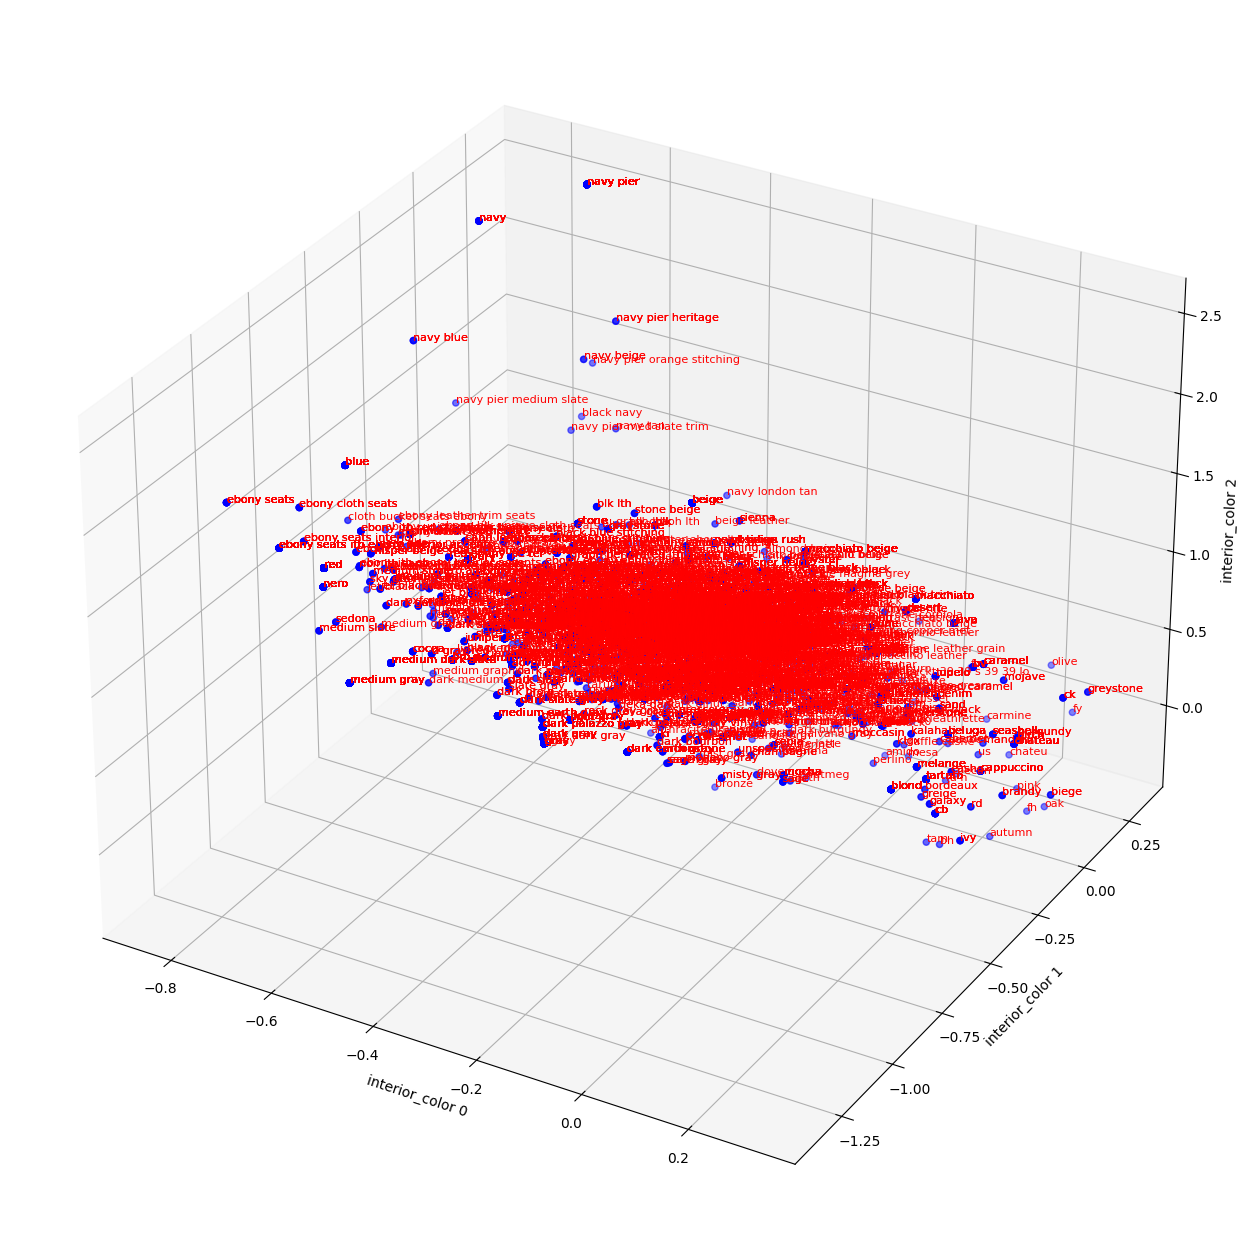

In [565]:
# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('interior_color 0')
ax.set_ylabel('interior_color 1')
ax.set_zlabel('interior_color 2')

# Show plot
plt.show()

In [566]:
# Once used drop the interior_color feature
cars_df.drop(columns='interior_color', inplace=True)
cars_df.shape

(26594, 65)

For now the interior color vertor will be used. None clustering method is applied.

#### price
Numerical and our target. Use a threshold to revome invalid prices

In [567]:
# Check price values
cars_df['price'].value_counts(dropna=False)

price
NaN        362
17995.0     59
9995.0      57
15995.0     56
14995.0     56
          ... 
46403.0      1
33457.0      1
72470.0      1
39461.0      1
45318.0      1
Name: count, Length: 13934, dtype: int64

In [568]:
# Remove missing values
cars_df = cars_df.loc[~cars_df['price'].isna()]
cars_df.shape

(26232, 65)

In [569]:
# Remove the values below the threshold defined
price_threshold = 1500
cars_df = cars_df.loc[cars_df['price']>=price_threshold]
cars_df.shape

(26217, 65)

In [570]:
# Show min price
cars_df['price'].min()

1500.0

In [571]:
# Show max price
cars_df['price'].max()

1699800.0

<Axes: >

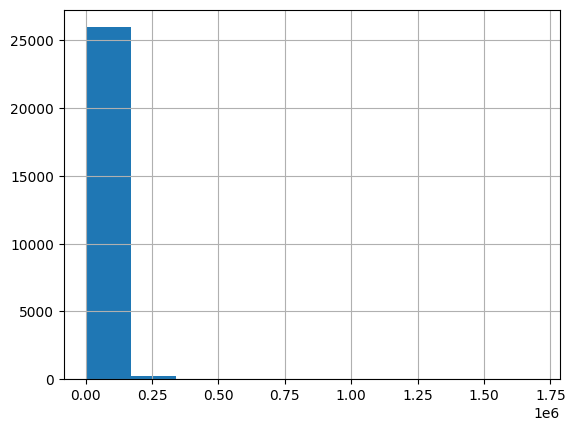

In [572]:
cars_df['price'].hist()

In [573]:
cars_df['price'].skew()

9.120636208066127

In [574]:
cars_df.reset_index(drop=True, inplace=True)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,exterior_color_x0,exterior_color_x1,exterior_color_x2,interior_color_x0,interior_color_x1,interior_color_x2
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,0.0,0.0,0.0,0.0,-1.213482,0.764471,0.578581,-0.289526,-0.257519,0.738283
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.476792,-0.691606,1.209194,-0.289526,-0.257519,0.738283
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,0.0,0.0,0.0,0.0,-1.464177,-0.246654,1.342255,-0.151220,0.218468,-0.162005
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.447453,-0.835432,0.817223,-0.412250,-0.976214,1.155223
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,0.0,0.0,0.0,0.0,-0.687335,-0.361123,0.903754,-0.299589,-0.091524,1.005499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26212,46720.0,2024,45318.0,Four-wheel Drive,5.0,Ford,SUV,suv_midsize,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.923606,-0.522941,1.369253,-0.124454,-1.332541,1.342001
26213,42975.0,2024,42975.0,FWD,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.122058,-0.577324,0.829045,-0.002936,-0.758812,1.016260
26214,27875.0,2024,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.579616,-0.640098,1.608053,-0.289526,-0.257519,0.738283
26215,33389.0,2024,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,New,...,0.0,0.0,0.0,0.0,-0.735606,-0.110067,0.841065,-0.289526,-0.257519,0.738283


Price has high skew, review methods to remove outliers

#### drivetrain
Close Vocabulary. group them by category

In [575]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      13059
Front-wheel Drive     5216
Four-wheel Drive      4540
Rear-wheel Drive      2165
AWD                    696
FWD                    208
4WD                    139
NaN                    113
RWD                     55
Unknown                 25
4x2                      1
Name: count, dtype: int64

In [576]:
def map_drivetrain(drivetrain):
    """
    Group the drive trian by categories

    :param drivetrain: Car drive train

    :return: Grouped drive train
    """
    if pd.isna(drivetrain):
        return np.nan

    match drivetrain:
        case 'All-wheel Drive' | 'Four-wheel Drive' | 'AWD' | '4WD' | '4x2':
            return 'All-wheel Drive'
        case 'Rear-wheel Drive' | 'RWD':
            return 'Rear-wheel Drive'
        case 'Front-wheel Drive' | 'FWD':
            return 'Front-wheel Drive'
        case 'Unknown':
            return np.nan
        case _:
            raise Exception(f"No expected drive train: {drivetrain}")
        

In [577]:
# Applt drive train transformation
cars_df['drivetrain'] = cars_df['drivetrain'].map(map_drivetrain)

In [578]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      18435
Front-wheel Drive     5424
Rear-wheel Drive      2220
NaN                    138
Name: count, dtype: int64

Before apply one hot encoding. Make sure the missing values where properly handled

NOTE: In this version we will remove them because they are few, but other techniques can be applied

In [579]:
# Filter the missing values in 'drivetrain'
cars_df = cars_df.loc[~cars_df['drivetrain'].isna()]
cars_df.reset_index(drop=True, inplace=True)
cars_df.shape

(26079, 65)

Apply One-hot encodding to transform drivetrain

In [580]:
# Initialize the OneHotEncoder drivetrain
drivetrain_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
drivetrain_encoded_data = drivetrain_encoder.fit_transform(cars_df[['drivetrain']])
drivetrain_encoded_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [581]:
len(drivetrain_encoded_data)

26079

In [582]:
# Convert the drivetrain encoded data into a DataFrame
drivetrain_encoded_df = pd.DataFrame(drivetrain_encoded_data, columns=drivetrain_encoder.get_feature_names_out(['drivetrain']))
drivetrain_encoded_df.reset_index(drop=True, inplace=True)
drivetrain_encoded_df

,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
26074,1.0,0.0,0.0
26075,0.0,1.0,0.0
26076,1.0,0.0,0.0
26077,1.0,0.0,0.0


In [583]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, drivetrain_encoded_df], axis=1)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,model_hashed_48,exterior_color_x0,exterior_color_x1,exterior_color_x2,interior_color_x0,interior_color_x1,interior_color_x2,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,0.0,-1.213482,0.764471,0.578581,-0.289526,-0.257519,0.738283,1.0,0.0,0.0
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,0.0,-0.476792,-0.691606,1.209194,-0.289526,-0.257519,0.738283,0.0,1.0,0.0
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,0.0,-1.464177,-0.246654,1.342255,-0.151220,0.218468,-0.162005,0.0,0.0,1.0
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,0.0,-0.447453,-0.835432,0.817223,-0.412250,-0.976214,1.155223,0.0,1.0,0.0
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,0.0,-0.687335,-0.361123,0.903754,-0.299589,-0.091524,1.005499,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26074,46720.0,2024,45318.0,All-wheel Drive,5.0,Ford,SUV,suv_midsize,Gasoline,New,...,0.0,-0.923606,-0.522941,1.369253,-0.124454,-1.332541,1.342001,1.0,0.0,0.0
26075,42975.0,2024,42975.0,Front-wheel Drive,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,New,...,0.0,-0.122058,-0.577324,0.829045,-0.002936,-0.758812,1.016260,0.0,1.0,0.0
26076,27875.0,2024,27875.0,All-wheel Drive,15.0,Mazda,SUV,crossover_compact,Gasoline,New,...,0.0,-0.579616,-0.640098,1.608053,-0.289526,-0.257519,0.738283,1.0,0.0,0.0
26077,33389.0,2024,30618.0,All-wheel Drive,5.0,Volkswagen,SUV,crossover_compact,Gasoline,New,...,0.0,-0.735606,-0.110067,0.841065,-0.289526,-0.257519,0.738283,1.0,0.0,0.0


In [584]:
# Once used drop the interior_color feature
cars_df.drop(columns='drivetrain', inplace=True)
cars_df.shape

(26079, 67)

#### mileage
No transformation needed

<Axes: >

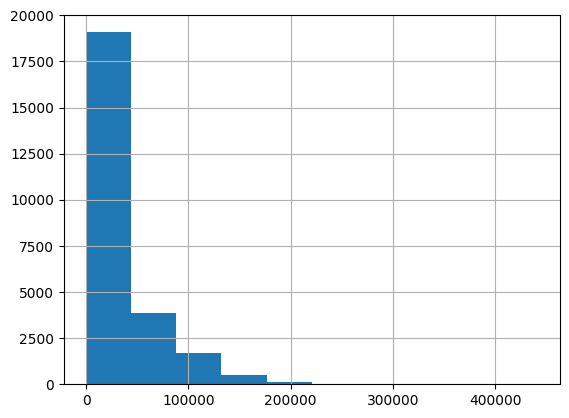

In [585]:
cars_df['mileage'].hist()

There are some outliers, feature has a high skew

#### make
Make feature has a semi-close vocabulary. We can use a pretrained model like Word2Vec or One-Hot encoding, this last one can generate the Curse Dimensinality and sparcity.

In [586]:
cars_df['make'].value_counts(dropna=False)

make
Ford             2717
Chevrolet        2049
Nissan           1688
Mercedes-Benz    1614
Hyundai          1584
Jeep             1418
BMW              1382
Volkswagen       1344
Subaru           1102
Toyota            991
Mazda             891
Dodge             867
Audi              829
Kia               824
Honda             780
Cadillac          770
Lexus             653
GMC               590
Acura             493
RAM               448
Lincoln           410
INFINITI          349
Buick             295
Volvo             264
Land Rover        233
Porsche           196
Tesla             180
Chrysler          155
Alfa Romeo        141
Jaguar            124
Genesis            88
Mitsubishi         76
Maserati           68
Bentley            56
Ferrari            55
Rolls-Royce        52
MINI               49
Rivian             40
Pontiac            36
Scion              35
Lamborghini        24
Aston Martin       23
FIAT               19
McLaren            14
Mercury            12
Humme

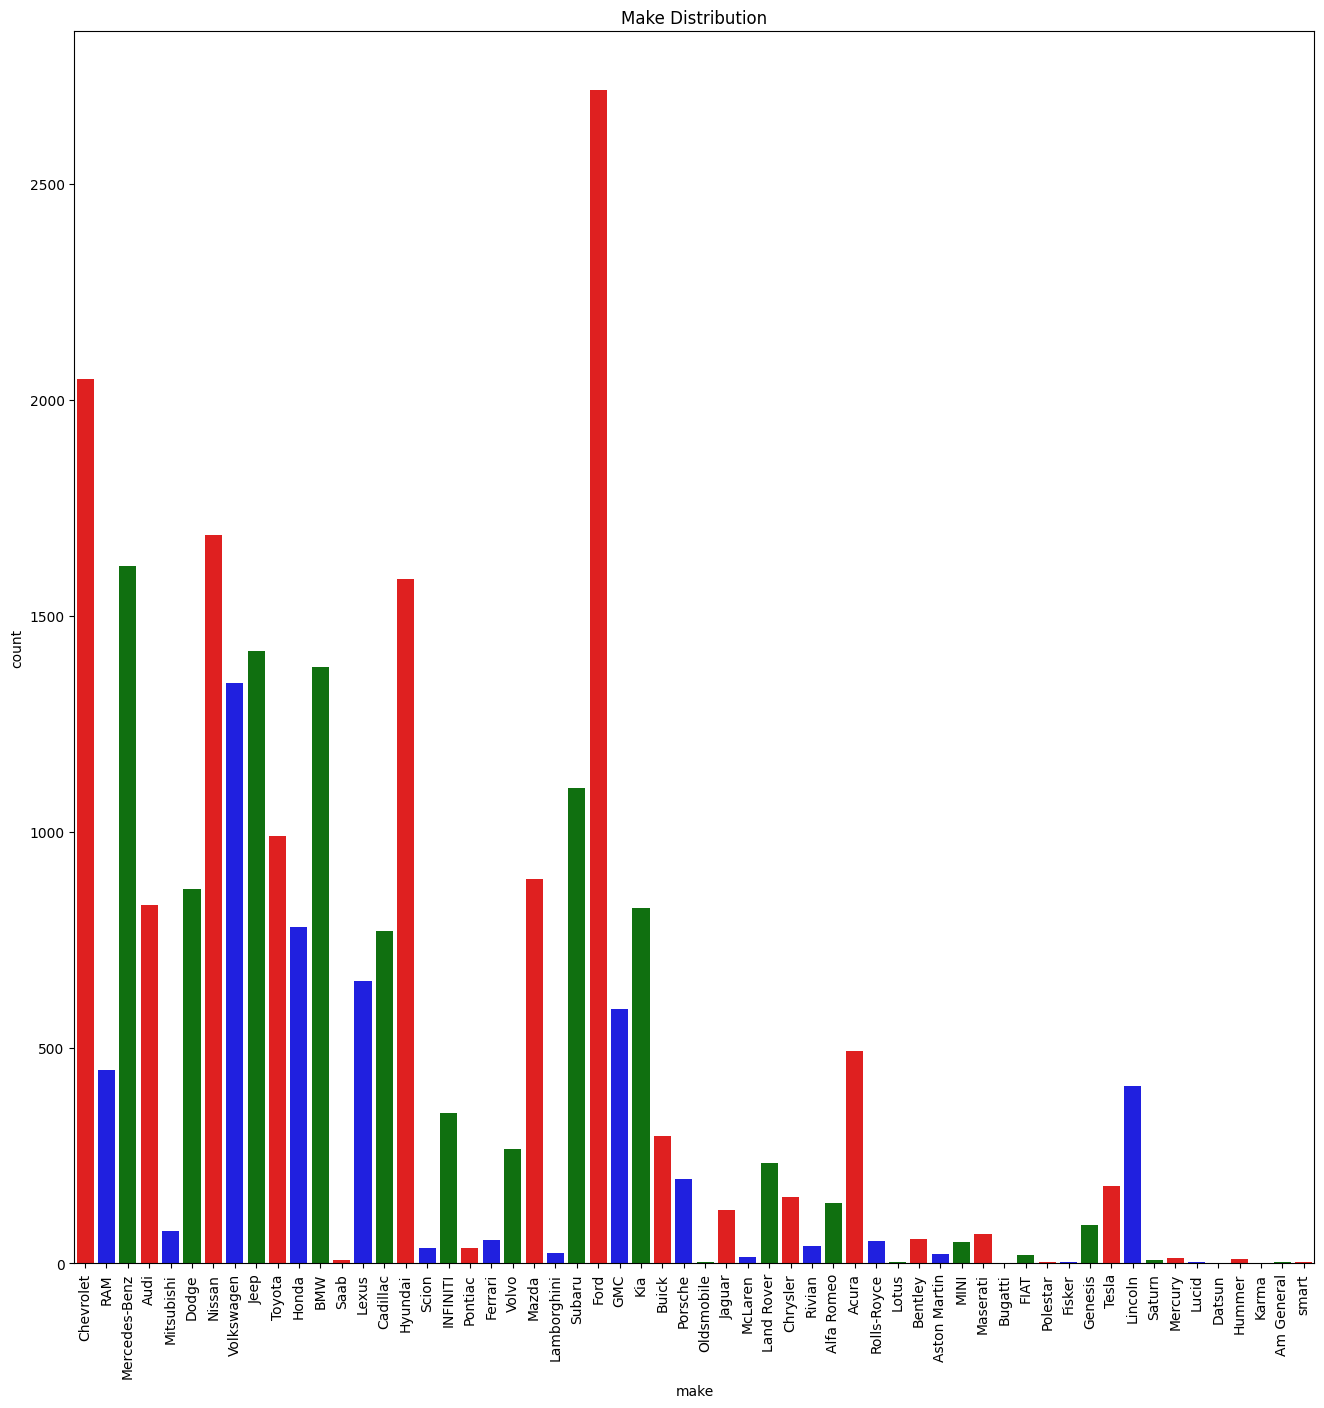

In [587]:
import seaborn as sns
# Set the figure size
plt.figure(figsize=(16, 16))
ax = sns.countplot(x='make', data=cars_df, palette=['red', 'blue', 'green'])
plt.title('Make Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

Any idea guys?

#### bodystyle
It seems a close vocabulaty (low cardinality). It's possible to apply one-hot encoding.

In [588]:
cars_df['bodystyle'].value_counts(dropna=False)

bodystyle
SUV              15928
Sedan             4474
Pickup Truck      2116
Coupe              928
Hatchback          782
Cargo Van          642
Convertible        611
Passenger Van      219
Wagon              200
NaN                115
Minivan             64
Name: count, dtype: int64

NOTE: There are some features values with unbalanced. Check it in depth in the meeting

And how should handle the inputation in Categorical features with mising values? 

Apply one-hot encodding

In [589]:
# Initialize the OneHotEncoder bodystyle
bodystyle_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
bodystyle_encoded_data = bodystyle_encoder.fit_transform(cars_df[['bodystyle']])

In [590]:
# Convert the drivetrain encoded data into a DataFrame
bodystyle_encoded_df = pd.DataFrame(bodystyle_encoded_data, columns=bodystyle_encoder.get_feature_names_out(['bodystyle']))
bodystyle_encoded_df.reset_index(drop=True, inplace=True)
bodystyle_encoded_df

,bodystyle_Cargo Van,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
26074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [591]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, bodystyle_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,make,bodystyle,cat,fuel_type,stock_type,model_hashed_0,...,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,57215.0,2024,54595.0,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26074,46720.0,2024,45318.0,5.0,Ford,SUV,suv_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26075,42975.0,2024,42975.0,10.0,Audi,Sedan,luxurypassenger_standard,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26076,27875.0,2024,27875.0,15.0,Mazda,SUV,crossover_compact,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26077,33389.0,2024,30618.0,5.0,Volkswagen,SUV,crossover_compact,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [592]:
# Once used drop the interior_color feature
cars_df.drop(columns='bodystyle', inplace=True)
cars_df.shape

(26079, 77)

#### cat
We can apply TF-IDF to cluster them in categories after split the text by '_'

In [593]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover_compact               5403
luxurysuv_crossover             3264
crossover_midsize               2316
suv_midsize                     1746
truck_fullsize                  1485
luxurypassenger_standard        1329
sedan_compact                   1237
sedan_midsize                   1057
hybrid_suv                      1042
luxurypassenger_plus             837
van_fullsize                     741
luxurysuv_suv                    624
suv_fullsize                     589
truck_compact                    564
coupeconvertible_coupe           481
ev_suv_midsize                   324
hybrid_passenger                 286
wagonhatchback_hatchback         279
ev_luxurysuv_suv                 265
coupeconvertible_coupesport      244
van_mini                         243
coupeconvertible_convertible     230
ev_crossover_midsize             212
ev_luxurypassenger_standard      207
NaN                              188
sportscar_standard               130
sedan_fullsize                   1

In [594]:
cars_df['cat'].unique()

array(['ev_crossover_midsize', 'van_fullsize', 'crossover_midsize',
       'crossover_compact', 'hybrid_suv', 'suv_midsize',
       'coupeconvertible_convertible', 'suv_fullsize', 'sedan_compact',
       'hybrid_passenger', 'luxurypassenger_plus', 'luxurysuv_crossover',
       'sedan_midsize', 'wagonhatchback_hatchback',
       'ev_wagonhatchback_hatchback', nan, 'luxurysuv_suv',
       'luxurypassenger_standard', 'coupeconvertible_coupesport',
       'coupeconvertible_coupe', 'sportscar_standard',
       'wagonhatchback_wagon', 'truck_fullsize', 'ev_luxurysuv_suv',
       'van_mini', 'ev_truck_fullsize', 'ev_suv_fullsize',
       'luxurypassenger_ultra', 'ev_suv_midsize',
       'ev_luxurypassenger_standard', 'sportscar_ultra', 'truck_compact',
       'sedan_fullsize', 'ev_sedan_compact', 'ev_wagonhatchback_wagon',
       'ev_luxurypassenger_plus', 'ev_sedan_midsize',
       'ev_crossover_compact', 'ev_sportscar_ultra', 'ev_van_fullsize'],
      dtype=object)

Any idea team?

#### fuel_type
It seems like a close category, Nominal. Group them by category

In [595]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline                         22366
Electric                          1433
Hybrid                            1240
Diesel                             501
E85 Flex Fuel                      358
NaN                                147
Flexible Fuel                       11
Plug-In Hybrid                       6
Gasoline Fuel                        6
Bio Diesel                           3
Plug-in Gas/Elec                     2
Electric with Ga                     1
Gas/Electric Hyb                     1
Hybrid Fuel                          1
Premium Unleaded                     1
Regular Unleaded                     1
Gasoline/Mild Electric Hybrid        1
Name: count, dtype: int64

In [596]:
def map_fuel_type(fuel_type):
    """
    Group by fuel types

    :param fuel_type: Car fuel type

    :return Fuel type category
    """
    if pd.isna(fuel_type):
        return np.nan

    match fuel_type:
        case 'Gasoline' | 'Gasoline Fuel' | 'Diesel' | 'Premium Unleaded' | 'Regular Unleaded' | 'Premium Unleaded':
            return 'Gasoline'
        case 'Electric' | 'Electric with Ga':
            return 'Electric'
        case 'Hybrid' | 'Plug-In Hybrid' | 'Plug-in Gas/Elec' | 'Gas/Electric Hyb' | 'Hybrid Fuel' | 'Bio Diesel' | 'Gasoline/Mild Electric Hybrid':
            return 'Hybrid'
        case 'Flexible Fuel' | 'E85 Flex Fuel'  | 'Flexible':
            return 'Flexible'
        case _:
            raise Exception(f"No expected drive train: {fuel_type}")
        

In [597]:
# Apply fuel type transformation
cars_df['fuel_type'] = cars_df['fuel_type'].map(map_fuel_type)

In [598]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline    22875
Electric     1434
Hybrid       1254
Flexible      369
NaN           147
Name: count, dtype: int64

Apply one hot encoding.

In [599]:
# Initialize the OneHotEncoder drivetrain
fuel_type_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
fuel_type_encoded_data = fuel_type_encoder.fit_transform(cars_df[['fuel_type']])


In [600]:
# Convert the drivetrain encoded data into a DataFrame
fuel_type_encoded_df = pd.DataFrame(fuel_type_encoded_data, columns=fuel_type_encoder.get_feature_names_out(['fuel_type']))
fuel_type_encoded_df.reset_index(drop=True, inplace=True)
fuel_type_encoded_df

,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_nan
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
26074,0.0,0.0,1.0,0.0,0.0
26075,0.0,0.0,1.0,0.0,0.0
26076,0.0,0.0,1.0,0.0,0.0
26077,0.0,0.0,1.0,0.0,0.0


In [601]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, fuel_type_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,make,cat,fuel_type,stock_type,model_hashed_0,model_hashed_1,...,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_nan
0,57215.0,2024,54595.0,0.0,Chevrolet,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,RAM,van_fullsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Mercedes-Benz,van_fullsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,Chevrolet,crossover_midsize,Gasoline,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,Audi,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26074,46720.0,2024,45318.0,5.0,Ford,suv_midsize,Gasoline,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26075,42975.0,2024,42975.0,10.0,Audi,luxurypassenger_standard,Gasoline,New,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26076,27875.0,2024,27875.0,15.0,Mazda,crossover_compact,Gasoline,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26077,33389.0,2024,30618.0,5.0,Volkswagen,crossover_compact,Gasoline,New,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [602]:
# Once used drop the interior_color feature
cars_df.drop(columns='fuel_type', inplace=True)
cars_df.shape

(26079, 81)

#### stock_type
Not Transformation Needed

In [603]:
def map_stock_type(stock_type):
    """
    Map stock_type

    :param stock_type: stock type New/Used

    :return Binary stock_type 
    """
    if pd.isna(stock_type):
        return np.nan

    match stock_type:
        case 'New':
            return True
        case 'Used':
            return False
        case _:
            raise Exception(f"No expected stock type: {stock_type}")
        

In [604]:
# Apply binary transformation
cars_df['stock_type'] = cars_df['stock_type'].map(map_stock_type)

In [605]:
cars_df['stock_type'].value_counts()

stock_type
True     13959
False    12120
Name: count, dtype: int64

In [606]:
cars_df

,msrp,year,price,mileage,make,cat,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,...,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_nan
0,57215.0,2024,54595.0,0.0,Chevrolet,ev_crossover_midsize,True,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,RAM,van_fullsize,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Mercedes-Benz,van_fullsize,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,Chevrolet,crossover_midsize,True,0.0,0.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,Audi,ev_crossover_midsize,True,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26074,46720.0,2024,45318.0,5.0,Ford,suv_midsize,True,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26075,42975.0,2024,42975.0,10.0,Audi,luxurypassenger_standard,True,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26076,27875.0,2024,27875.0,15.0,Mazda,crossover_compact,True,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26077,33389.0,2024,30618.0,5.0,Volkswagen,crossover_compact,True,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
